<a href="https://colab.research.google.com/github/viktoruebelhart/uci_bank/blob/main/UCI_BANK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These data are related to marketing campaigns, based on telephone calls, from a Portuguese banking institution. The goal is to understand, from this dataset, whether a client will subscribe to a term deposit (variable y) at the bank. The marketing campaigns were conducted via telephone calls. Often, more than one contact with the same client was required to determine whether the product (bank term deposit) would be acquired or not.

In [184]:
import pandas as pd

df = pd.read_csv('/content/UCI Machine Learning Repository - Bank.csv', sep=';')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [185]:
df.shape

(4521, 17)

age: The client’s age.

job: The client’s occupation/profession.

marital: The client’s marital status (e.g., single, married).

education: The client’s education level.

default: Indicates if the client has any outstanding credit in default.

balance: The client’s average bank account balance.

housing: Indicates if the client has a housing loan.

loan: Indicates if the client has a personal loan.

contact: The type of telephone contact (e.g., mobile, landline).

day: The day of the last phone contact.

month: The month of the last phone contact.

duration: The duration (in seconds) of the last phone contact.

campaign: The number of contacts performed during this campaign.

pdays: The number of days since the last contact from a previous campaign.

previous: The number of contacts made before this campaign.

poutcome: The result of the previous marketing campaign (e.g., success,
failure).

y: The target variable, indicating whether the client subscribed (yes/no) to a term deposit.

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [187]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


#Analysis of customer age distribution

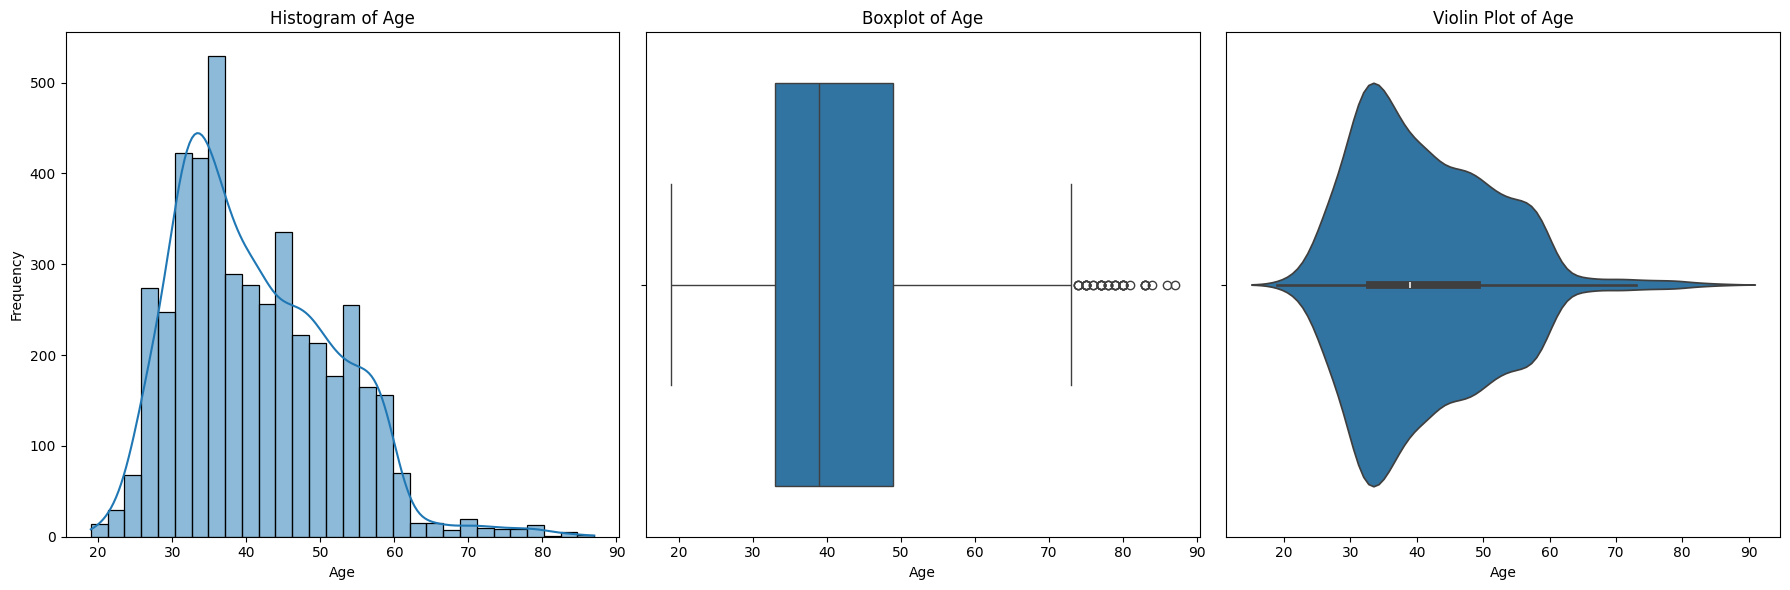

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['age'], ax=axes[1])
axes[1].set_title('Boxplot of Age')
axes[1].set_xlabel('Age')

# Violin plot
sns.violinplot(x=df['age'], ax=axes[2])
axes[2].set_title('Violin Plot of Age')
axes[2].set_xlabel('Age')

# Adjust spacing
plt.tight_layout()

# Display the plots
plt.show()

In [189]:
df['age'].describe()

,age
count,4521.000000
mean,41.170095
std,10.576211
min,19.000000
25%,33.000000
50%,39.000000
75%,49.000000
max,87.000000


#Analysis of the distribution of client work

In [190]:
job_distribution = df['job'].value_counts()
job_distribution

,count
job,
management,969
blue-collar,946
technician,768
admin.,478
services,417
retired,230
self-employed,183
entrepreneur,168
unemployed,128


In [191]:
job_percentage = df['job'].value_counts(normalize=True) * 100
job_percentage

,proportion
job,
management,21.433311
blue-collar,20.924574
technician,16.987392
admin.,10.572882
services,9.223623
retired,5.087370
self-employed,4.047777
entrepreneur,3.715992
unemployed,2.831232


In [192]:
# Creating a DataFrame for the job percentage distribution
job_percentage_df = job_percentage.reset_index()
job_percentage_df.columns = ['Job', 'Percentage']

display(job_percentage_df)

,Job,Percentage
0,management,21.433311
1,blue-collar,20.924574
2,technician,16.987392
3,admin.,10.572882
4,services,9.223623
5,retired,5.087370
6,self-employed,4.047777
7,entrepreneur,3.715992
8,unemployed,2.831232
9,housemaid,2.477328


#What are the main forms of contact with the bank?

In [193]:
df['contact'].value_counts()

,count
contact,
cellular,2896
unknown,1324
telephone,301


In [194]:
df['contact'].value_counts(normalize=True)*100

,proportion
contact,
cellular,64.056625
unknown,29.285556
telephone,6.657819


#Analysis of age in relation to balance

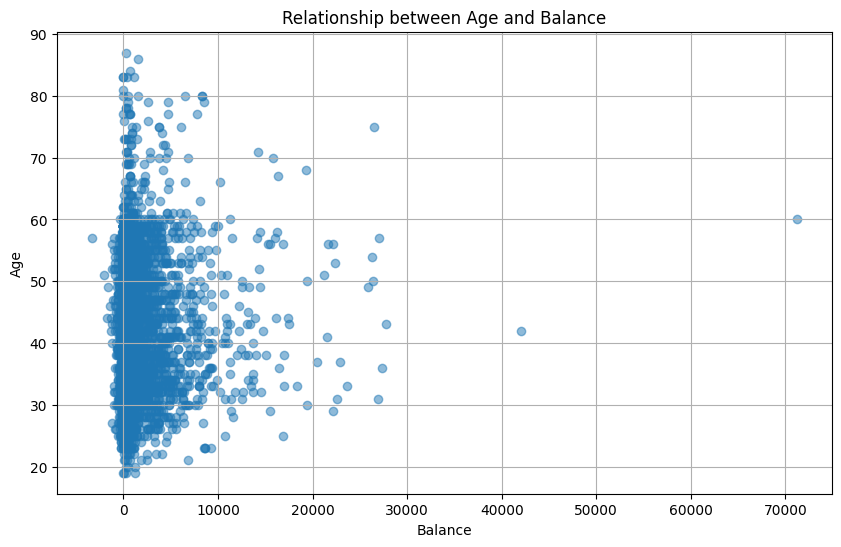

In [195]:
import matplotlib.pyplot as plt

# Scatter plot to analyze the relationship between age and balance
plt.figure(figsize=(10, 6))
plt.scatter(df['balance'], df['age'], alpha=0.5)
plt.title('Relationship between Age and Balance')
plt.xlabel('Balance')
plt.ylabel('Age')
plt.grid(True)
plt.show()

Distribution of bank balances: Bank balances vary considerably, with many people having low or zero balances. Fewer individuals have large balances.

Absence of a strong linear pattern: There is no obvious linear pattern between age and balance. In other words, age does not appear to directly influence bank balances in a linear fashion.

Specific patterns: It is possible to observe that some younger people have larger bank balances, while older people may have low or zero balances. However, this pattern is not clear enough to indicate a strong trend.

In [196]:
# Calculate the correlation coefficient between 'age' and 'balance'
correlation = df[['age', 'balance']].corr().iloc[0, 1]
correlation


0.0838201422447774

The correlation coefficient between age and balance is approximately 0.084. This indicates a very weak positive correlation between the two variables. In other words, there is little to no linear relationship between age and balance in this dataset

In [197]:
df['balance'].describe()

,balance
count,4521.000000
mean,1422.657819
std,3009.638142
min,-3313.000000
25%,69.000000
50%,444.000000
75%,1480.000000
max,71188.000000


Text(0.5, 24.0, 'Balance')

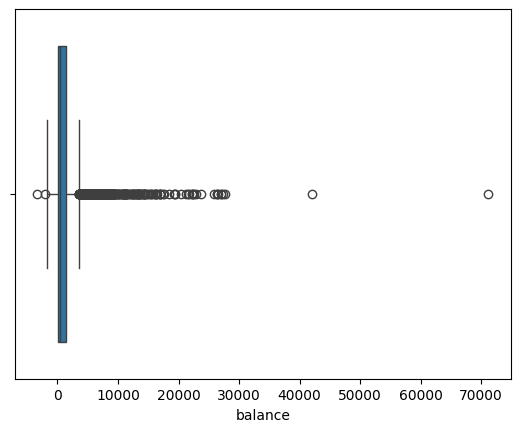

In [198]:
# Boxplot Balance
sns.boxplot(x=df['balance'])
axes[1].set_title('Boxplot of Balance')
axes[1].set_xlabel('Balance')

#Analyzing bank balance according to default possession

---



In [199]:
# Calculate the correlation between 'balance' and 'default'
# First, we need to convert 'default' to a numeric value (0 for 'no', 1 for 'yes')
df['default_numeric'] = df['default'].apply(lambda x: 1 if x == 'yes' else 0)

# Calculate the correlation coefficient
correlation_balance_default = df[['balance', 'default_numeric']].corr().iloc[0, 1]
correlation_balance_default

-0.07088595607544959

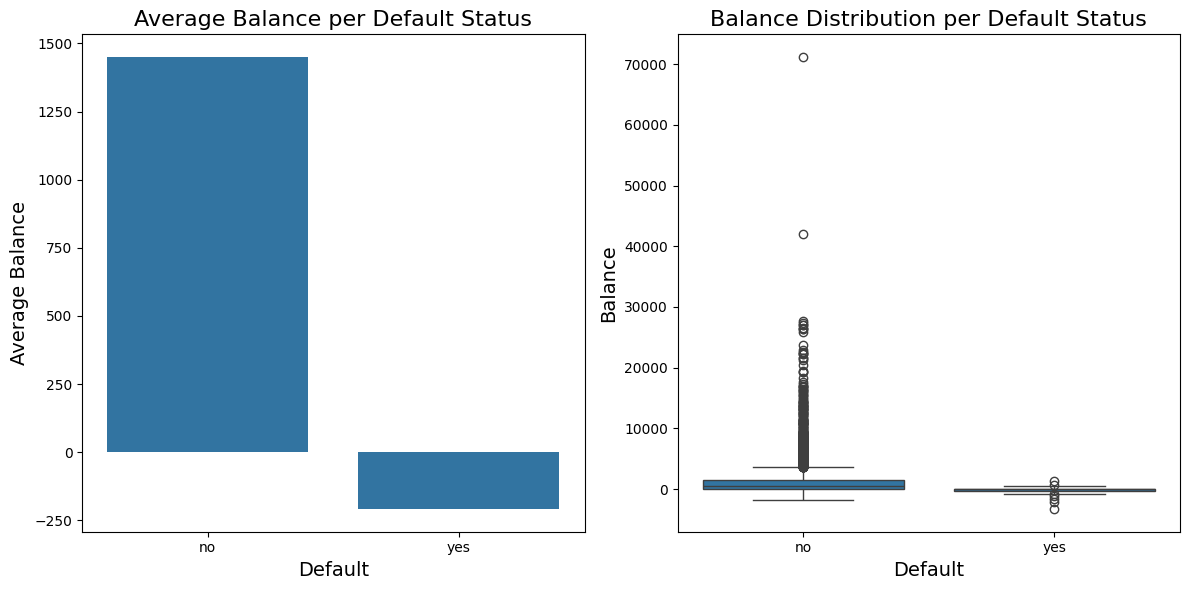

In [200]:
# Create subplots with both barplot and boxplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot on the first subplot
sns.barplot(x='default', y='balance', data=df, errorbar=None, ax=axes[0])
axes[0].set_title('Average Balance per Default Status', fontsize=16)
axes[0].set_xlabel('Default', fontsize=14)
axes[0].set_ylabel('Average Balance', fontsize=14)

# Box plot on the second subplot
sns.boxplot(x='default', y='balance', data=df, ax=axes[1])
axes[1].set_title('Balance Distribution per Default Status', fontsize=16)
axes[1].set_xlabel('Default', fontsize=14)
axes[1].set_ylabel('Balance', fontsize=14)

# Display the plots
plt.tight_layout()
plt.show()

This plot shows the average balance for each default status ('yes' and 'no'). It suggests that people who have not defaulted tend to have higher average balances than those who have defaulted.

##Analysis of bank balance according to who has and who does not have a housing loan

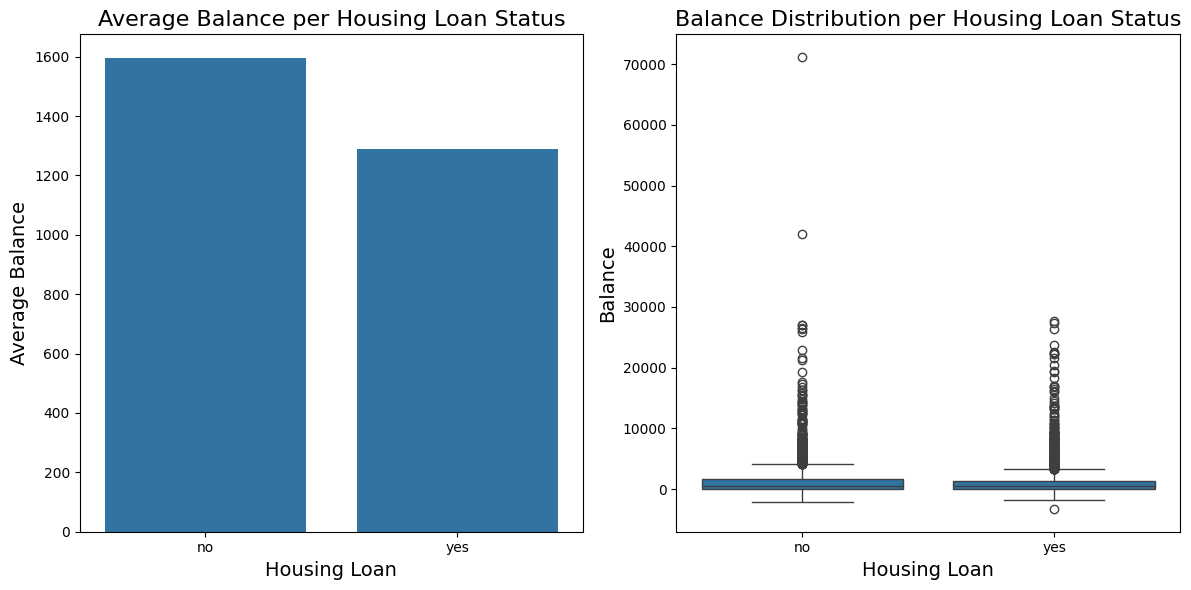

In [201]:
# Create subplots with both barplot and boxplot for 'housing' vs 'balance'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot on the first subplot
sns.barplot(x='housing', y='balance', data=df, errorbar=None, ax=axes[0])
axes[0].set_title('Average Balance per Housing Loan Status', fontsize=16)
axes[0].set_xlabel('Housing Loan', fontsize=14)
axes[0].set_ylabel('Average Balance', fontsize=14)

# Box plot on the second subplot
sns.boxplot(x='housing', y='balance', data=df, ax=axes[1])
axes[1].set_title('Balance Distribution per Housing Loan Status', fontsize=16)
axes[1].set_xlabel('Housing Loan', fontsize=14)
axes[1].set_ylabel('Balance', fontsize=14)

# Display the plots
plt.tight_layout()
plt.show()


#Bank balance analysis according to who has and who doesn't have a loan

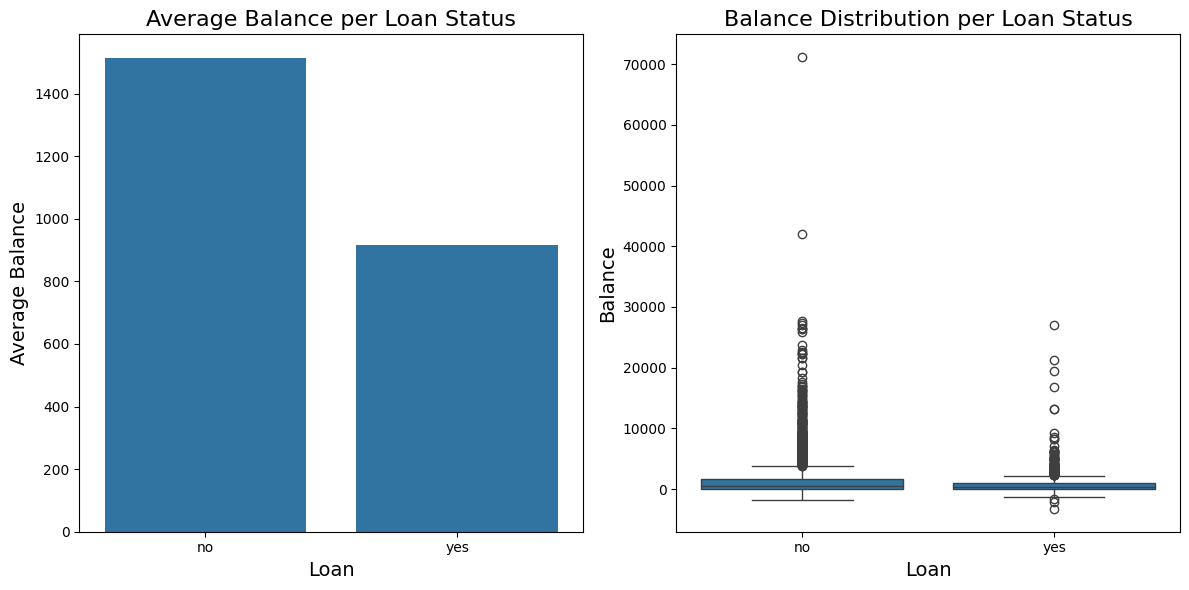

In [202]:
# Create subplots with both barplot and boxplot for 'loan' vs 'balance'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot on the first subplot
sns.barplot(x='loan', y='balance', data=df, errorbar=None, ax=axes[0])
axes[0].set_title('Average Balance per Loan Status', fontsize=16)
axes[0].set_xlabel('Loan', fontsize=14)
axes[0].set_ylabel('Average Balance', fontsize=14)

# Box plot on the second subplot
sns.boxplot(x='loan', y='balance', data=df, ax=axes[1])
axes[1].set_title('Balance Distribution per Loan Status', fontsize=16)
axes[1].set_xlabel('Loan', fontsize=14)
axes[1].set_ylabel('Balance', fontsize=14)

# Display the plots
plt.tight_layout()
plt.show()

Customers who do not have a loan tend to have a higher average account balance compared to those with loans.

This may suggest that paying off loans reduces the available balance or that customers with higher balances are less likely to take loans.

#Analyze the variable balance in the outliers

In [203]:

Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outliers_up = df[(df['balance'] > upper_bound)]
df_outliers_down = df[(df['balance'] < lower_bound)]
df_75 = df[df['balance'] <= Q3]
df_25 = df[df['balance'] <= Q1]

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Q1: 69.0
Q3: 1480.0
IQR: 1411.0
Lower Bound: -2047.5
Upper Bound: 3596.5


In [204]:
df.shape

(4521, 18)

In [205]:
df_outliers_up.shape

(504, 18)

In [206]:
df_outliers_down.shape

(2, 18)

In [207]:
df_25.shape

(1133, 18)

In [208]:
df_75.shape

(3392, 18)

In [209]:
no_outliers = df.drop(df_outliers_up.index)
no_outliers.shape

(4017, 18)

Is the proportion of customers who acquired the bank's term deposit the same between outliers and non-outliers?

In [210]:
#concat df
df_combined_description_2 = pd.concat([df_outliers_up['y'].value_counts(normalize=True), no_outliers['y'].value_counts(normalize=True)], axis=1)

#rename
df_combined_description_2.columns = ['Outliers', 'No Outliers']

df_combined_description_2

,Outliers,No Outliers
y,,
no,0.857143,0.888225
yes,0.142857,0.111775


The conclusion shows that the proportion of "No Outliers" maintains a higher rate for the "no" group (88.82%) compared to "Outliers" (85.71%), while the "yes" group is smaller in both cases, but slightly more represented in "Outliers" (14.29%) than in "No Outliers" (11.18%).

Are the mean and age distribution of the outliers similar to those of the non-outliers?


In [211]:
# Create a combined description DataFrame for age
df_combined_age_description = pd.concat([df_outliers_up['age'].describe(), no_outliers['age'].describe()], axis=1)
df_combined_age_description.columns = ['Outliers', 'No Outliers']
df_combined_age_description

,Outliers,No Outliers
count,504.000000,4017.000000
mean,43.281746,40.905153
std,11.761378,10.389344
min,21.000000,19.000000
25%,34.000000,33.000000
50%,41.000000,39.000000
75%,51.000000,48.000000
max,80.000000,87.000000


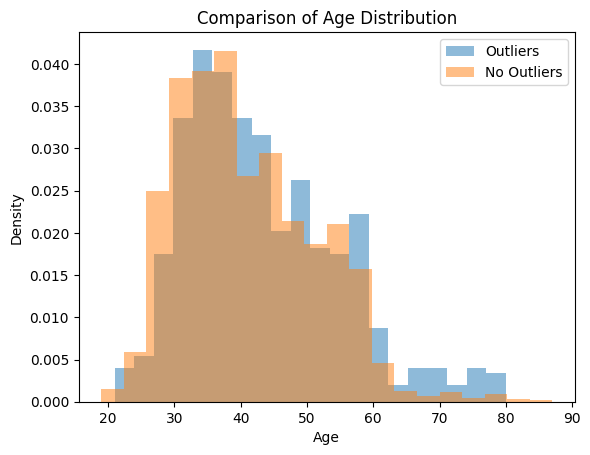

In [212]:
plt.hist(df_outliers_up['age'], bins=20, alpha=0.5, label='Outliers', density=True)
plt.hist(no_outliers['age'], bins=20, alpha=0.5, label='No Outliers', density=True)

plt.title('Comparison of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


Ages appear to be similar across the distribution with only a small difference between ages 65 and 80. This shows a slightly higher number of Ouliers than No Outliers.

In [213]:
# Filter the DataFrame for ages between 65 and 80
filtered_df = df[(df['age'] >= 65) & (df['age'] <= 80)]

# Display the filtered DataFrame
filtered_df.shape

(81, 18)

In [214]:
# Calculate the number of outliers and no outliers in the filtered DataFrame
df_outliers_up_filtered = filtered_df[(filtered_df['balance'] > upper_bound)]
no_outliers_filtered = filtered_df.drop(df_outliers_up_filtered.index)

num_outliers = len(df_outliers_up_filtered)
num_no_outliers = len(no_outliers_filtered)
total_filtered = len(filtered_df)

print("Number of Total 65 and 80 ages:", total_filtered)
print("Number of Outliers between 65 and 80 ages:", num_outliers)
print("Number of No Outliers between 65 and 80 ages:", num_no_outliers)

Number of Total 65 and 80 ages: 81
Number of Outliers between 65 and 80 ages: 27
Number of No Outliers between 65 and 80 ages: 54


In [217]:
# Density
density_outliers = num_outliers / len(df_outliers_up)
density_no_outliers = num_no_outliers / len(no_outliers)

# Show Results
print(f"Density of Outliers (ages 65-80): {density_outliers:.2%}")
print(f"Density of No Outliers (ages 65-80): {density_no_outliers:.2%}")


Density of Outliers (ages 65-80): 5.36%
Density of No Outliers (ages 65-80): 1.34%


The density analysis reveals that outliers in the 65-80 age range (5.36%) are significantly more prevalent than non-outliers in the same age group (1.34%).

Are the mean and balance distribution of outliers similar to those of non-outliers?

In [216]:
#concat df
df_combined_description = pd.concat([df_outliers_up['balance'].describe(), no_outliers['balance'].describe()], axis=1)

#rename
df_combined_description.columns = ['Outliers', 'No Outliers']

df_combined_description

,Outliers,No Outliers
count,504.000000,4017.000000
mean,7628.188492,644.069953
std,5646.738441,872.881652
min,3601.000000,-3313.000000
25%,4412.250000,44.000000
50%,5735.000000,340.000000
75%,8499.250000,978.000000
max,71188.000000,3587.000000


The comparison shows that the "Outliers" group has significantly higher mean (7628.19 vs. 644.07) and maximum values (71188 vs. 3587) compared to the "No Outliers" group. Additionally, the standard deviation is much larger for outliers, indicating greater variability in this group. In contrast, the "No Outliers" group has a narrower range of values, suggesting more consistent data.

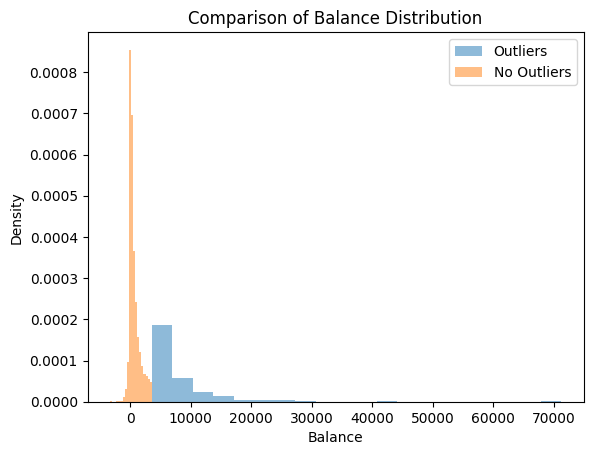

In [219]:
plt.hist(df_outliers_up['balance'], bins=20, alpha=0.5, label='Outliers', density=True)
plt.hist(no_outliers['balance'], bins=20, alpha=0.5, label='No Outliers', density=True)

plt.title('Comparison of Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()